In [96]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('agecov.csv')
df

,確定病名,發病年份,發病月份,縣市,鄉鎮,性別,是否為境外移入,年齡層,確定病例數
0,嚴重特殊傳染性肺炎,2020,1,台中市,太平區,M,否,30-34,1
1,嚴重特殊傳染性肺炎,2020,1,空值,空值,F,是,50-54,3
2,嚴重特殊傳染性肺炎,2020,1,空值,空值,F,是,55-59,2
3,嚴重特殊傳染性肺炎,2020,1,空值,空值,F,是,70+,2
4,嚴重特殊傳染性肺炎,2020,1,空值,空值,M,是,20-24,1
...,...,...,...,...,...,...,...,...,...
81169,嚴重特殊傳染性肺炎,2022,9,澎湖縣,湖西鄉,M,否,65-69,10
81170,嚴重特殊傳染性肺炎,2022,9,澎湖縣,白沙鄉,M,否,70+,5
81171,嚴重特殊傳染性肺炎,2022,9,澎湖縣,西嶼鄉,M,否,70+,8
81172,嚴重特殊傳染性肺炎,2022,9,澎湖縣,馬公市,M,否,70+,78


In [97]:
df['年齡層'].unique()

array(['30-34', '50-54', '55-59', '70+', '20-24', '40-44', '65-69',
       '45-49', '60-64', '15-19', '25-29', '35-39', '10月14日', '3', '5月9日',
       '4', '1', '2', '0'], dtype=object)

In [98]:
map_dict = {'10月14日': '10-14','5月9日': '55-59','2':'20-24','3':'30-34','4':'40-44','0':'0-4','1':'05-09'}
df['年齡層'] = df['年齡層'].replace(map_dict)

In [99]:
df['年齡層'].unique()

array(['30-34', '50-54', '55-59', '70+', '20-24', '40-44', '65-69',
       '45-49', '60-64', '15-19', '25-29', '35-39', '10-14', '05-09',
       '0-4'], dtype=object)

In [102]:
df = df.loc[:,['年齡層','確定病例數']]

,年齡層,確定病例數
0,30-34,1
1,50-54,3
2,55-59,2
3,70+,2
4,20-24,1
...,...,...
81169,65-69,10
81170,70+,5
81171,70+,8
81172,70+,78


In [103]:
df = df.groupby(['年齡層']).sum().sort_values('確定病例數', ascending=False)
df

,確定病例數
年齡層,
55-59,727977
40-44,655234
30-34,613945
25-29,565601
35-39,565292
20-24,523434
45-49,449817
70+,423905
50-54,373287


        確定病例數
年齡層          
55-59  727977
40-44  655234
30-34  613945
25-29  565601
35-39  565292
20-24  523434
45-49  449817
70+    423905
50-54  373287
60-64  317581
15-19  303416
10-14  296190
65-69  257900
05-09   57966
0-4     37579


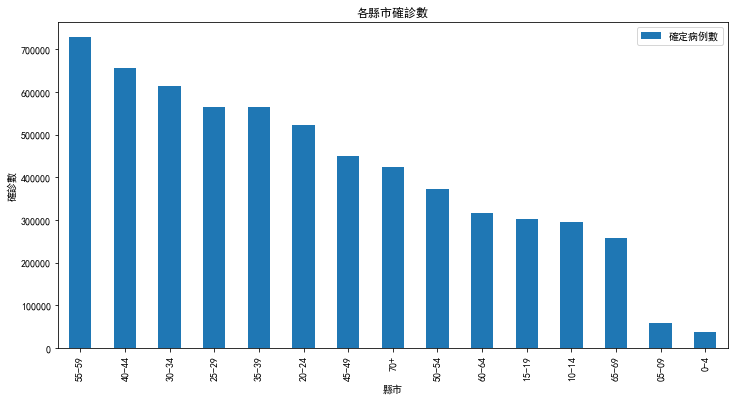

In [105]:
df.plot(kind = 'bar',figsize=(12,6))
# 設定標頭和字體
plt.title('各縣市確診數')
# 設定 x 軸標頭和字體
plt.xlabel('縣市')
# 設定 y 軸標頭和字體
plt.ylabel('確診數')

print(df)
plt.show()